In [201]:
using Plots, PlotThemes, LaTeXStrings
using OffsetArrays
using Unitful
using FFTW
using Base: Fix1, Fix2

pyplot()
j=im
default(fontfamily="serif", textcolor="black", palette=:seaborn_deep6)


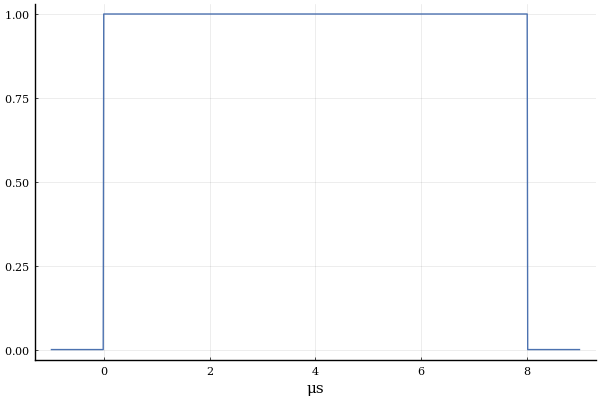

In [202]:
T_TR = 1.000u"ns"
Δ_F = 20u"MHz"/64
T_SHORT = 8u"μs"
T_LONG = 8u"μs"
T_GI2 = 1.6u"μs"

function w(T, t)
    if t < -T_TR/2 
        return 0
    elseif t < T_TR/2
        return sin(π/2*(0.5+t/T_TR))^2
    elseif t < T-T_TR/2
        return 1
    elseif t < T+T_TR/2
        return sin(π/2*(0.5-(t-T)/T_TR))^2
    else
        return 0
    end
end

t = range(-1u"μs", 9u"μs", length=1000)


plot(t, Fix1(w, T_SHORT), legend=false)

In [203]:
S = OffsetArray(sqrt(13/6).*[0, 0, 1+j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, -1-j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, 0,
0, 0, 0, -1-j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0,0], -26:26)

L = OffsetArray([1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 0,
1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0] .|> Complex, -26:26) 


r_l(t) = w(T_LONG,t)*sum(L[k]*exp(j*k*2π*Δ_F*(t-T_GI2)) for k in eachindex(L))

r_s(t) = w(T_SHORT,t)*sum(S[k]*exp(j*k*2π*Δ_F*t) for k in eachindex(S))

r_s (generic function with 1 method)

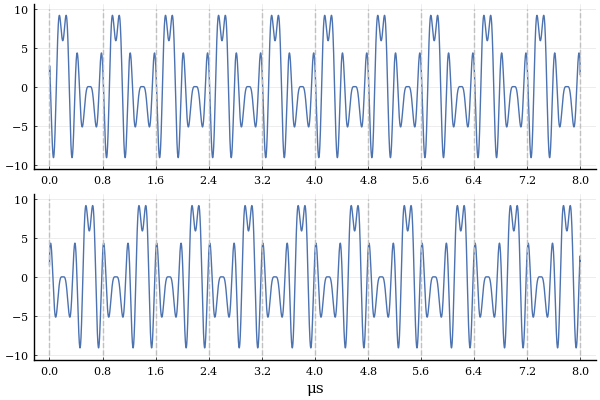

In [204]:
t = range(0u"μs", 8u"μs", length=5000)

rs = r_s.(t)

p1 = plot(t, real(rs), xlabel="")
p2 = plot(t, imag(rs))
for i in 0:0.8:8
    plot!(p1, [i,i], [-10,10], linestyle=:dash, linecolor=:silver)
    plot!(p2, [i,i], [-10,10], linestyle=:dash, linecolor=:silver)
end

plot(p1, p2, layout=(2,1), legend=false, xticks=0:0.8:8)

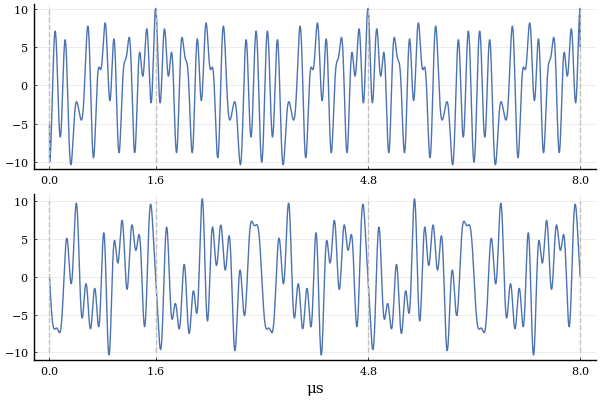

In [205]:
rl = r_l.(t)

p1 = plot(t, real(rl), xlabel="")
p2 = plot(t, imag(rl))

for i in [0,1.6,4.8,8]
    plot!(p1, [i,i], [-10,10], linestyle=:dash, linecolor=:silver)
    plot!(p2, [i,i], [-10,10], linestyle=:dash, linecolor=:silver)
end

plot(p1, p2, layout=(2,1), legend = false, xticks=[0,1.6,4.8,8])

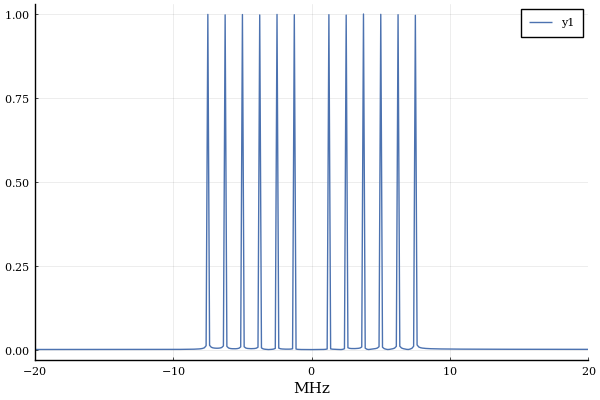

In [206]:
f = fftfreq(length(t), 1/(t[2]-t[1]) |> u"MHz")
plot(f |> fftshift, abs.(fft(rs))./maximum(abs.(fft(rs)))|>fftshift, xlim=(-20u"MHz", 20u"MHz"))

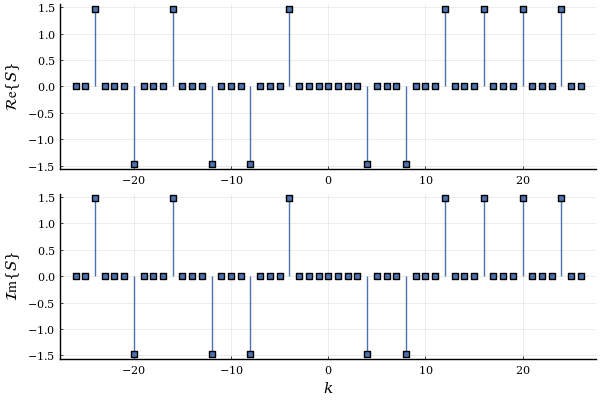

In [207]:
p1 = plot(real(S), line=:stem, marker=:square, ylabel=L"\mathcal{Re}\{S\}")
p2 = plot(imag(S), line=:stem, marker=:square, ylabel=L"\mathcal{Im}\{S\}", xlabel=L"k")

plot(p1,p2, layout=(2,1), legend=false)

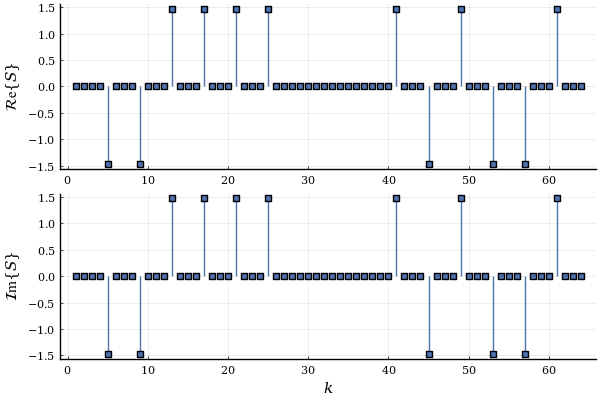

In [208]:
shift(x) = [i in 1:26 ? x[i] : (i in 38:63 ? x[i-64] : 0.0+im*0.0) for i in 0:63]

S_shift = shift(S)

p1 = plot(S_shift |> real, line=:stem, marker=:square, ylabel=L"\mathcal{Re}\{S\}")
p2 = plot(S_shift |> imag, line=:stem, marker=:square, ylabel=L"\mathcal{Im}\{S\}", xlabel=L"k")

plot(p1,p2, layout=(2,1), legend=false)

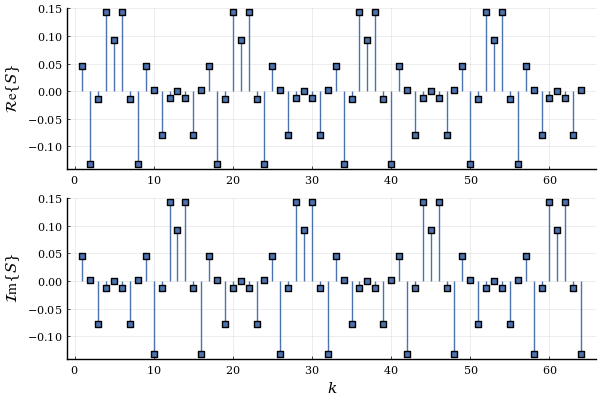

In [209]:
using FFTW 
S_time = ifft(S_shift)

p1 = plot(S_time |> real, line=:stem, marker=:square, ylabel=L"\mathcal{Re}\{S\}")
p2 = plot(S_time |> imag, line=:stem, marker=:square, ylabel=L"\mathcal{Im}\{S\}", xlabel=L"k")

plot(p1,p2, layout=(2,1), legend=false)

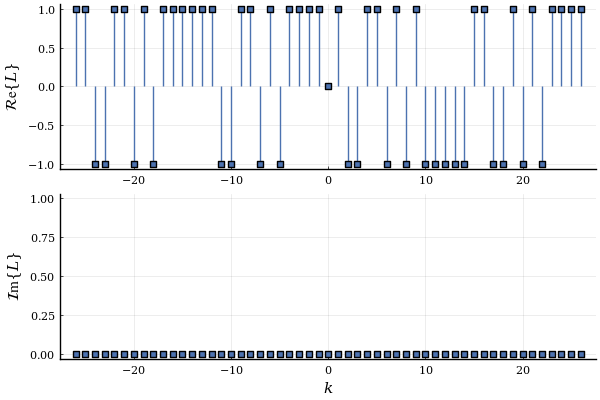

In [210]:
p1 = plot(real(L), line=:stem, marker=:square, ylabel=L"\mathcal{Re}\{L\}")
p2 = plot(imag(L), line=:stem, marker=:square, ylabel=L"\mathcal{Im}\{L\}", xlabel=L"k")

plot(p1,p2, layout=(2,1), legend=false)

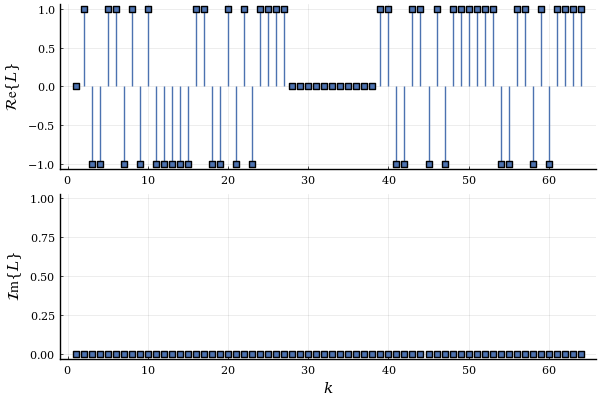

In [211]:
L_shift = shift(L)

p1 = plot(L_shift |> real, line=:stem, marker=:square, ylabel=L"\mathcal{Re}\{L\}")
p2 = plot(L_shift |> imag, line=:stem, marker=:square, ylabel=L"\mathcal{Im}\{L\}", xlabel=L"k")

plot(p1,p2, layout=(2,1), legend=false)

In [212]:
L_shift

64-element Vector{ComplexF64}:
  0.0 + 0.0im
  1.0 + 0.0im
 -1.0 + 0.0im
 -1.0 + 0.0im
  1.0 + 0.0im
  1.0 + 0.0im
 -1.0 + 0.0im
  1.0 + 0.0im
 -1.0 + 0.0im
  1.0 + 0.0im
      ⋮
  1.0 + 0.0im
  1.0 + 0.0im
 -1.0 + 0.0im
  1.0 + 0.0im
 -1.0 + 0.0im
  1.0 + 0.0im
  1.0 + 0.0im
  1.0 + 0.0im
  1.0 + 0.0im

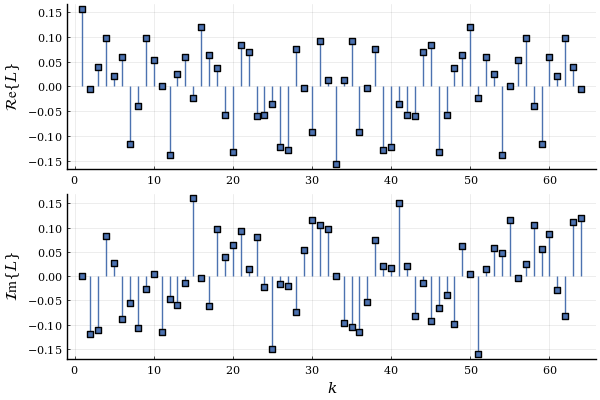

In [213]:
L_time = ifft(L_shift)

p1 = plot(L_time |> real, line=:stem, marker=:square, ylabel=L"\mathcal{Re}\{L\}")
p2 = plot(L_time |> imag, line=:stem, marker=:square, ylabel=L"\mathcal{Im}\{L\}", xlabel=L"k")

plot(p1,p2, layout=(2,1), legend=false)

In [214]:
function unshift(x) 
    xz = OffsetArray(x, 0:63)
    OffsetArray([i == 0 ? 0 : (i in 1:26 ? xz[i] : xz[i+64]) for i in -26:26], -26:26)
end


unshift (generic function with 1 method)

In [215]:
unshift(fft(S_time)).-S |> println

ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, -2.220446049250313e-16 - 2.220446049250313e-16im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -2.220446049250313e-16 + 2.220446049250313e-16im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 2.220446049250313e-16im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 2.220446049250313e-16 - 2.220446049250313e-16im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 2.220446049250313e-16 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 2.220446049250313e-16 - 2.220446049250313e-16im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 - 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 2.220446049250313e-16 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 2.220446049250313e-16 - 2.220446049250313e-16im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 4.440892098500626e-16 - 2.220446049250313e-16im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -2.220446049250313e-16 + 2.220446049250313e-16im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -2.220446049250313e-16 + 2.220

In [216]:
unshift(fft(L_time)).-L  |> println

ComplexF64[0.0 - 7.779106652169216e-20im, 0.0 - 1.9696882594440972e-17im, 2.220446049250313e-16 + 1.7942497748855317e-17im, -2.220446049250313e-16 - 8.256994005351815e-17im, 2.220446049250313e-16 - 3.1560526749717486e-17im, 4.440892098500626e-16 - 6.265552145688186e-17im, -2.220446049250313e-16 + 3.316432493711034e-17im, 2.220446049250313e-16 - 2.487848042678419e-16im, 3.3306690738754696e-16 - 8.655625174974879e-17im, 2.220446049250313e-16 + 3.1440674789388e-17im, 0.0 - 1.3877787807814457e-17im, -2.220446049250313e-16 + 9.565960628694339e-17im, -1.1102230246251565e-16 + 3.1560526749717486e-17im, -1.1102230246251565e-16 - 7.374130466491371e-17im, 0.0 + 2.234682629414748e-17im, -4.440892098500626e-16 + 2.860645877088668e-16im, 2.220446049250313e-16 - 7.779106652169216e-20im, 0.0 + 1.3295878329151805e-16im, -1.1102230246251565e-16 + 1.6836579846918693e-18im, -2.220446049250313e-16 - 1.935922425160338e-16im, -2.220446049250313e-16 + 2.395062448154034e-17im, -2.220446049250313e-16 + 1.26871

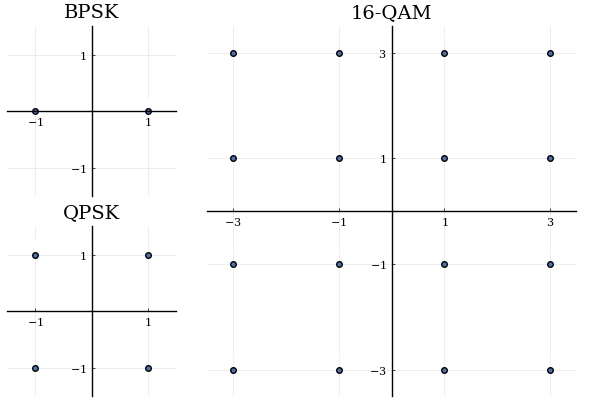

In [217]:
I = [-1, 1]
Q = [ 0, 0]
c = [ 0, 1]
p1 = scatter(I, Q, framestyle=:origin, aspect_ratio=:equal, xlim=(-1.5, 1.5), ylim=(-1.5,1.5),title="BPSK", xticks=[-1,1], yticks=[-1,1])
annotate!(I, Q.+0.125, Plots.text.(c, :white, 10), legend=false)
I = [-1,-1, 1, 1]
Q = [-1, 1,-1, 1]
c = [00,01,10,11]
p2 = scatter(I, Q, framestyle=:origin, aspect_ratio=:equal, xlim=(-1.5, 1.5), ylim=(-1.5,1.5),title="QPSK", xticks=[-1,1], yticks=[-1,1])
annotate!(I, Q.+0.125, Plots.text.(c, :white, 10), legend=false)
I = vcat([repeat([i],4) for i in [-3,-1,3,1]]...)
Q = repeat([-3,-1,1,3],4)
c = ["0000","0001","0011","0010","0100","0101","0111","0110","1100","1101","1111","1110","1010","1011","1001","1000"]
lim = 3.5
p3 = scatter(I, Q, framestyle=:origin, aspect_ratio=:equal, xlim=(-lim,lim), ylim=(-lim,lim), title="16-QAM", ticks=[-3,-1,1,3], yticks=[-3,-1,1,3])
annotate!(I, Q.+0.25, Plots.text.(c, :white, 10),legend=:false)
px = plot(p1,p2, layout=(2,1))
plot(px,p3, layout=grid(1,2, widths=[0.3, 0.7]))

In [218]:
ktoi(N, k) = N/16*(k%16)+floor(k/16) |> Int
itoj(N, s, i) = s*floor(i/s)+(i+N-floor((16*i)/N))%s |> Int
jtoi(N, s, j) = s*floor(j/s)+(j+floor((16*j)/N))%s |> Int
itok(N, i) = 16*i-(N-1)*floor((16*i)/N) |> Int

itok (generic function with 1 method)

In [219]:
N = 192
s = 2
ks = 0:N-1
println(ks |> collect)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191]


In [220]:
is = ktoi.(N, ks) 
println(is)
js = itoj.(N,s,is)
println(is)

[0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180, 1, 13, 25, 37, 49, 61, 73, 85, 97, 109, 121, 133, 145, 157, 169, 181, 2, 14, 26, 38, 50, 62, 74, 86, 98, 110, 122, 134, 146, 158, 170, 182, 3, 15, 27, 39, 51, 63, 75, 87, 99, 111, 123, 135, 147, 159, 171, 183, 4, 16, 28, 40, 52, 64, 76, 88, 100, 112, 124, 136, 148, 160, 172, 184, 5, 17, 29, 41, 53, 65, 77, 89, 101, 113, 125, 137, 149, 161, 173, 185, 6, 18, 30, 42, 54, 66, 78, 90, 102, 114, 126, 138, 150, 162, 174, 186, 7, 19, 31, 43, 55, 67, 79, 91, 103, 115, 127, 139, 151, 163, 175, 187, 8, 20, 32, 44, 56, 68, 80, 92, 104, 116, 128, 140, 152, 164, 176, 188, 9, 21, 33, 45, 57, 69, 81, 93, 105, 117, 129, 141, 153, 165, 177, 189, 10, 22, 34, 46, 58, 70, 82, 94, 106, 118, 130, 142, 154, 166, 178, 190, 11, 23, 35, 47, 59, 71, 83, 95, 107, 119, 131, 143, 155, 167, 179, 191]


[0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180, 1, 13, 25, 37, 49, 61, 73, 85, 97, 109, 121, 133, 145, 157, 169, 181, 2, 14, 26, 38, 50, 62, 74, 86, 98, 110, 122, 134, 146, 158, 170, 182, 3, 15, 27, 39, 51, 63, 75, 87, 99, 111, 123, 135, 147, 159, 171, 183, 4, 16, 28, 40, 52, 64, 76, 88, 100, 112, 124, 136, 148, 160, 172, 184, 5, 17, 29, 41, 53, 65, 77, 89, 101, 113, 125, 137, 149, 161, 173, 185, 6, 18, 30, 42, 54, 66, 78, 90, 102, 114, 126, 138, 150, 162, 174, 186, 7, 19, 31, 43, 55, 67, 79, 91, 103, 115, 127, 139, 151, 163, 175, 187, 8, 20, 32, 44, 56, 68, 80, 92, 104, 116, 128, 140, 152, 164, 176, 188, 9, 21, 33, 45, 57, 69, 81, 93, 105, 117, 129, 141, 153, 165, 177, 189, 10, 22, 34, 46, 58, 70, 82, 94, 106, 118, 130, 142, 154, 166, 178, 190, 11, 23, 35, 47, 59, 71, 83, 95, 107, 119, 131, 143, 155, 167, 179, 191]


In [221]:
using SparseArrays
spy(sparse(ks.+1 ,is.+1, repeat([1], N)), title=L"k \rightarrow i", markersize=2, markershape=:square)

savefig("ktoi.svg")

"/home/inox/Documents/IB/Proyecto Integrador/ktoi.svg"

In [222]:
spy(sparse(is.+1 ,js.+1, repeat([1], N)) , title=L"i \rightarrow j", markersize=2, markershape=:square)

savefig("itoj.svg")

"/home/inox/Documents/IB/Proyecto Integrador/itoj.svg"

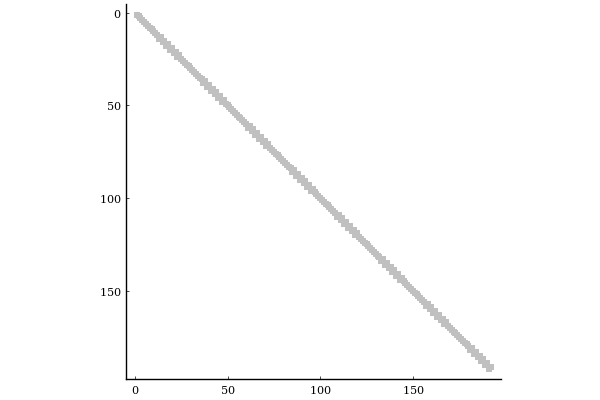

In [223]:
spy(sparse(js.+1,is.+1, repeat([1], N)); params...)

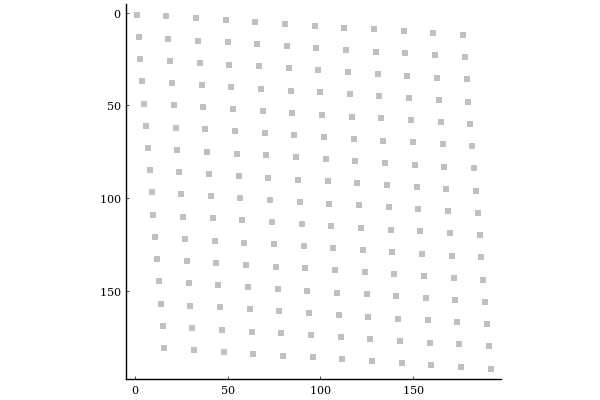

In [224]:
spy(sparse(is.+1 ,ks.+1, repeat([1], N)); params...)

In [225]:
#using TikzPictures
#
#step = 100
#s1 = join("\\draw ($k,$(0*step)) -- ($i,$(1*step));\n" for (k, i) in zip(ks, is))
#s2 = join("\\draw ($i,$(1*step)) -- ($j,$(2*step));\n" for (i,j) in zip(is, js))
#s3 = join("\\draw ($i,$(2*step)) -- ($j,$(3*step));\n" for (i,j) in zip(is, js))
#s4 = join("\\draw ($k,$(3*step)) -- ($i,$(4*step));\n" for (k, i) in zip(ks, is))
#
#tp = TikzPicture(s1*s2*s3*s4)
#save(PDF("test"), tp)


In [226]:
t = range(0u"μs", 16u"μs", length=5*64) |> collect

320-element Vector{Quantity{Float64, 𝐓, Unitful.FreeUnits{(μs,), 𝐓, nothing}}}:
                  0.0 μs
 0.050156739811912224 μs
  0.10031347962382445 μs
  0.15047021943573669 μs
   0.2006269592476489 μs
   0.2507836990595611 μs
  0.30094043887147337 μs
   0.3510971786833856 μs
   0.4012539184952978 μs
  0.45141065830721006 μs
                       ⋮
   15.598746081504702 μs
   15.648902821316614 μs
   15.699059561128527 μs
    15.74921630094044 μs
   15.799373040752352 μs
   15.849529780564263 μs
   15.899686520376175 μs
   15.949843260188088 μs
                 16.0 μs

In [228]:
S_short = S_time[1:16]
vcat(repeat(S_short,10)...)

160-element Vector{ComplexF64}:
    0.0459987545121242 + 0.0459987545121242im
   -0.1324437168516233 + 0.00233959188499im
 -0.013472723270465878 - 0.07852478575378252im
   0.14275529282051708 - 0.012651167853883802im
    0.0919975090242484 + 0.0im
    0.1427552928205171 - 0.012651167853883816im
 -0.013472723270465885 - 0.07852478575378252im
   -0.1324437168516233 + 0.002339591884990014im
    0.0459987545121242 + 0.0459987545121242im
      0.00233959188499 - 0.1324437168516233im
                       ⋮
   -0.1324437168516233 + 0.002339591884990014im
    0.0459987545121242 + 0.0459987545121242im
      0.00233959188499 - 0.1324437168516233im
  -0.07852478575378252 - 0.013472723270465878im
 -0.012651167853883802 + 0.14275529282051708im
                   0.0 + 0.0919975090242484im
 -0.012651167853883816 + 0.1427552928205171im
  -0.07852478575378252 - 0.013472723270465878im
      0.00233959188499 - 0.13244371685162332im

In [229]:
vcat(zeros(32), L_time, L_time)

160-element Vector{ComplexF64}:
                   0.0 + 0.0im
                   0.0 + 0.0im
                   0.0 + 0.0im
                   0.0 + 0.0im
                   0.0 + 0.0im
                   0.0 + 0.0im
                   0.0 + 0.0im
                   0.0 + 0.0im
                   0.0 + 0.0im
                   0.0 + 0.0im
                       ⋮
  0.053337734374151305 - 0.004076326480508336im
   0.09754126073623884 + 0.025888347648318447im
  -0.03831596747441847 + 0.10617091261510256im
  -0.11513121478170157 + 0.055180495374370364im
  0.059823844859014236 + 0.08770675983572168im
   0.02111177034932945 - 0.027885918828227548im
    0.0968318845911275 - 0.08279790948776067im
   0.03974969835350049 + 0.1111579430511643im
 -0.005121250360419827 + 0.12032513267372753im

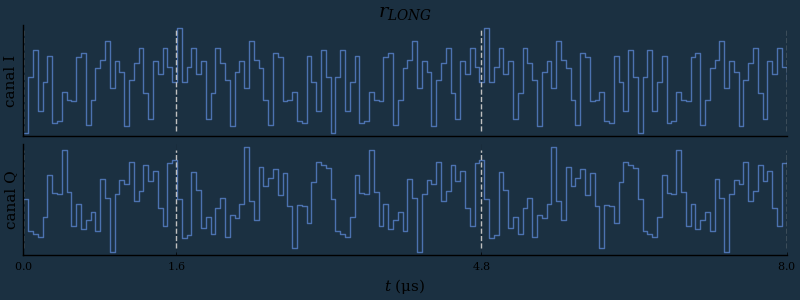

In [230]:
tiks = [0, 1.6,4.8,8]

t = range(0u"μs", 8u"μs", length=160)


ltr_t = vcat(L_time[end-31:end], L_time, L_time)

p1 = plot(t, real(ltr_t), xlim=[0,8], yticks=false, line=:steppost, ylabel="canal I", xlabel="", xticks=[], title=L"r_{LONG}")
p2 = plot(t, imag(ltr_t), xlim=[0,8], yticks=false, line=:steppost, ylabel="canal Q", xticks=tiks, xlabel=L"t")

for i in tiks
    plot!(p1, [i,i], [-0.15,0.15], linestyle=:dash, linecolor=:silver)
    plot!(p2, [i,i], [-0.15,0.15], linestyle=:dash, linecolor=:silver)
end

plot(p1, p2, layout=(2,1), legend = false, size=(800,300), background_color="#1b3041")

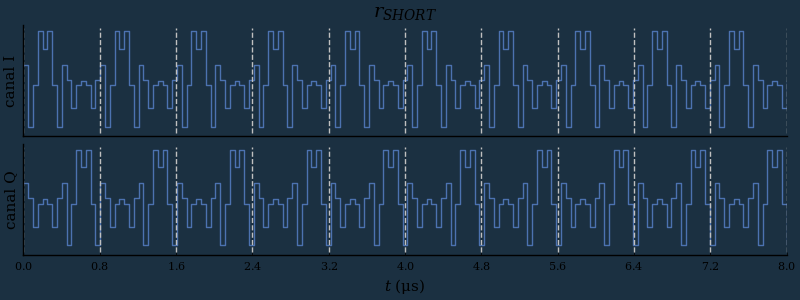

In [231]:
tiks = [0:0.8:8...]

t = range(0u"μs", 8u"μs", length=160)

str_t = vcat(repeat(S_time[1:16],10)...)

p1 = plot(t, real(str_t), xlim=[0,8], yticks=false, line=:steppost, ylabel="canal I", xlabel="", xticks=[], title=L"r_{SHORT}")
p2 = plot(t, imag(str_t), xlim=[0,8], yticks=false, line=:steppost, ylabel="canal Q", xticks=tiks, xlabel=L"t")

for i in tiks
    plot!(p1, [i,i], [-0.15,0.15], linestyle=:dash, linecolor=:silver)
    plot!(p2, [i,i], [-0.15,0.15], linestyle=:dash, linecolor=:silver)
end

plot(p1, p2, layout=(2,1), legend = false, size=(800,300), background_color="#1b3041")

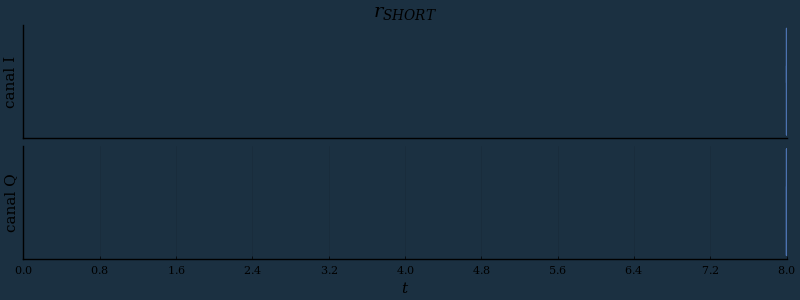

In [232]:
str_tx = vcat([repeat([i],10) for i in str_t]...)

t_tx = range(8, 8, length=160*10)

p1 = plot(t_tx, real(str_tx), xlim=[0,8], yticks=false, line=:steppost, ylabel="canal I", xlabel="", xticks=[], title=L"r_{SHORT}")
p2 = plot(t_tx, imag(str_tx), xlim=[0,8], yticks=false, line=:steppost, ylabel="canal Q", xticks=tiks, xlabel=L"t")

plot(p1, p2, layout=(2,1), legend = false, size=(800,300), background_color="#1b3041")

In [233]:
hs = [1, 0.5*im, 0.25*im, -0.1]
τs = [21, 44, 98, 147]

z = reduce((x,y) -> x.+y, [h*vcat(zeros(τ), h*str_tx[τ+1:end]) for (h,τ) in zip(hs,τs)])

1600-element Vector{ComplexF64}:
                  0.0 + 0.0im
                  0.0 + 0.0im
                  0.0 + 0.0im
                  0.0 + 0.0im
                  0.0 + 0.0im
                  0.0 + 0.0im
                  0.0 + 0.0im
                  0.0 + 0.0im
                  0.0 + 0.0im
                  0.0 + 0.0im
                      ⋮
 0.001631865339780525 - 0.09237949250400726im
 0.001631865339780525 - 0.09237949250400726im
 0.001631865339780525 - 0.09237949250400726im
 0.001631865339780525 - 0.09237949250400726im
 0.001631865339780525 - 0.09237949250400726im
 0.001631865339780525 - 0.09237949250400726im
 0.001631865339780525 - 0.09237949250400726im
 0.001631865339780525 - 0.09237949250400726im
 0.001631865339780525 - 0.09237949250400726im

In [234]:
p1 = plot(t_tx, real(z), xlim=[0,8], yticks=false, line=:steppost, ylabel="canal I", xlabel="", xticks=[], title=L"r_{SHORT}")
plot!(t, real(str_t), xlim=[0,8], yticks=false, line=:steppost, linestyle=:dash, ylabel="canal I", xlabel="", xticks=[], title=L"r_{SHORT}")
p2 = plot(t_tx, imag(z), xlim=[0,8], yticks=false, line=:steppost, ylabel="canal Q", xticks=tiks, xlabel=L"t")
plot!(t, imag(str_t), xlim=[0,8], yticks=false, line=:steppost, linestyle=:dash, ylabel="canal Q", xticks=tiks, xlabel=L"t")

plot(p1, p2, layout=(2,1), legend = false, size=(800,300), background_color="#1b3041")

Unitful.DimensionError: DimensionError:  and μs are not dimensionally compatible.

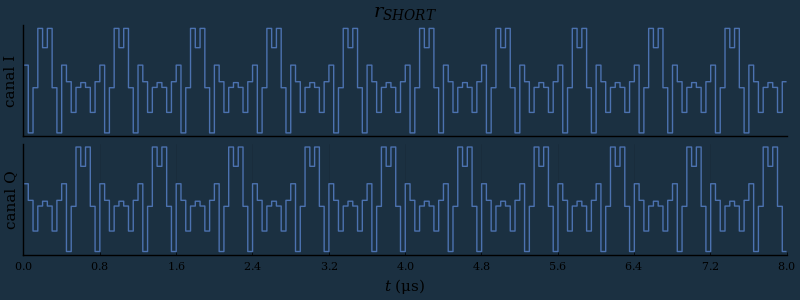

In [235]:
str_tx = vcat([repeat([i],10) for i in str_t]...)

t_tx = range(0u"μs", 8u"μs", length=160*10)

p1 = plot(t_tx, real(str_tx), xlim=[0,8], yticks=false, line=:steppost, ylabel="canal I", xlabel="", xticks=[], title=L"r_{SHORT}")
p2 = plot(t_tx, imag(str_tx), xlim=[0,8], yticks=false, line=:steppost, ylabel="canal Q", xticks=tiks, xlabel=L"t")

plot(p1, p2, layout=(2,1), legend = false, size=(800,300), background_color="#1b3041")

In [236]:
using Distributions: Normal
d = Normal(0, 0.001)
z_rx = [z[i] + (rand(d)+im*rand(d)) for i in eachindex(z) if i%10==0]

160-element Vector{ComplexF64}:
  0.002085296778061041 + 0.0033018993106384833im
 0.0009710605551839234 - 0.0003030635938913087im
 -0.014062558266195674 - 0.07781242751979975im
   0.14278726014117027 - 0.012541954632162072im
   0.07041185282398042 - 0.0006595045858906384im
     0.107931370549583 - 0.007395837709227694im
 -0.009882296325535283 - 0.05980295905262915im
  -0.09942860793129252 + 0.003444505486321822im
  0.035902598733463756 + 0.033599191021851355im
  0.002438620979070857 - 0.09196083575884803im
                       ⋮
  -0.09086297713484487 + 0.0024481489435046024im
   0.03317064182594929 + 0.032927145857236315im
 0.0017462478762597577 - 0.09289096031538763im
 -0.055156427538421336 - 0.008897383191656878im
 -0.008907410069316871 + 0.09834901223546844im
 0.0003832516132334661 + 0.06387909265915254im
 -0.007014687918382039 + 0.09912513451341358im
  -0.05304153788470465 - 0.008608971290020228im
 0.0016192698032016402 - 0.09144339242365455im

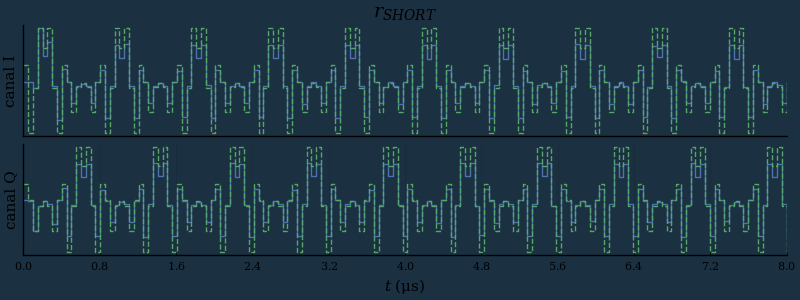

In [237]:
p1 = plot(t, real(z_rx), xlim=[0,8], yticks=false, line=:steppost, ylabel="canal I", xlabel="", xticks=[], title=L"r_{SHORT}")
plot!(t, real(str_t), xlim=[0,8], yticks=false, line=:steppost, linestyle=:dash, ylabel="canal I", xlabel="", xticks=[], title=L"r_{SHORT}")
p2 = plot(t, imag(z_rx), xlim=[0,8], yticks=false, line=:steppost, ylabel="canal Q", xticks=tiks, xlabel=L"t")
plot!(t, imag(str_t), xlim=[0,8], yticks=false, line=:steppost, linestyle=:dash, ylabel="canal Q", xticks=tiks, xlabel=L"t")

plot(p1, p2, layout=(2,1), legend = false, size=(800,300), background_color="#1b3041")

In [238]:
U = 10
R = 16
K = 5
N = U*R

u = 0:K

0:5

In [239]:
function phi_blue(u, N, R, z_aux)
    z = OffsetArray(z_aux, 0:N-1)
    return z[R:N-1]'*z[0:N-1-R]/(N-u*R)
end

phi_blue (generic function with 1 method)

In [240]:
str_tx

1600-element Vector{ComplexF64}:
 0.0459987545121242 + 0.0459987545121242im
 0.0459987545121242 + 0.0459987545121242im
 0.0459987545121242 + 0.0459987545121242im
 0.0459987545121242 + 0.0459987545121242im
 0.0459987545121242 + 0.0459987545121242im
 0.0459987545121242 + 0.0459987545121242im
 0.0459987545121242 + 0.0459987545121242im
 0.0459987545121242 + 0.0459987545121242im
 0.0459987545121242 + 0.0459987545121242im
 0.0459987545121242 + 0.0459987545121242im
                    ⋮
   0.00233959188499 - 0.13244371685162332im
   0.00233959188499 - 0.13244371685162332im
   0.00233959188499 - 0.13244371685162332im
   0.00233959188499 - 0.13244371685162332im
   0.00233959188499 - 0.13244371685162332im
   0.00233959188499 - 0.13244371685162332im
   0.00233959188499 - 0.13244371685162332im
   0.00233959188499 - 0.13244371685162332im
   0.00233959188499 - 0.13244371685162332im

In [242]:
function phi(u, phi_aux)
    phi_vec = OffsetArray(phi_aux,-1)
    return angle(angle(phi_vec[u])-angle(phi_vec[u-1]))
end

phis = [phi(ui, [phi_blue(ui, N, R, z_rx) for ui in 0:K]) for ui in 1:K]

function blue_est(U, K, phi)
    w(u) = 3*(U-u)*(U-u+1)-K*(U-K)/(K*(4*K^2-6*U*K+3*U^2-1))
    return U/(2pi)*sum(w.(1:K).*phi)
end

blue_est(U, K, phis)

449.7474747474748

In [243]:
mod(3,2)

1

In [244]:
function scramble(x)
    [mod(x[7]+x[4],2), x[1:6]...]
end

scramble (generic function with 1 method)

In [245]:
svec = [1,1,1,1,1,1,1]
for i in 1:127
    svec = scramble(svec)
    print(svec[1])
end

0000111011110010110010010000001000100110001011101011011000001100110101001110011110110100001010101111101001010001101110001111111